In [40]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Filter to my columns and print head, shape

In [41]:
# read in data from csv to pandas
data = pd.read_csv('train.csv')

# select my rows (first 3 pages)
response = data[['SalePrice']]
predictors = data[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
              'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',]]

# print the first 5 rows of the data
print(predictors.head())
print(response.head())


# print the shape of the data
print(predictors.shape)
print(response.shape)


   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  
0       Norm     1Fam     2Story            7            5  
1       Norm     1Fam     1Sto

### How many nulls are in the data

In [42]:
# data info
print(predictors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Street        1460 non-null   object 
 5   Alley         91 non-null     object 
 6   LotShape      1460 non-null   object 
 7   LandContour   1460 non-null   object 
 8   Utilities     1460 non-null   object 
 9   LotConfig     1460 non-null   object 
 10  LandSlope     1460 non-null   object 
 11  Neighborhood  1460 non-null   object 
 12  Condition1    1460 non-null   object 
 13  Condition2    1460 non-null   object 
 14  BldgType      1460 non-null   object 
 15  HouseStyle    1460 non-null   object 
 16  OverallQual   1460 non-null   int64  
 17  OverallCond   1460 non-null   int64  
dtypes: float64(1), int64(4), obj

In [43]:
# print the unique values of Alley
print(predictors['Alley'].unique())
print(predictors['LotFrontage'].unique())

[nan 'Grvl' 'Pave']
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


### The only columns with nulls are LotFrontage and Alley. 

- Alley nulls - not actually null just means there is no alley access. Should be converted to a more meaningful identifier.
- LotFrontage - intuitively a useful predictor. Nulls can either be removed or converted to 0 since a property can have 0 lot frontage


In [ ]:
# Change nulls in LotFrontage to 0
predictors['LotFrontage'] = predictors['LotFrontage'].fillna(0)

[ 65.  80.  68.  60.  84.  85.  75.   0.  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


/var/folders/d4/wnjlm8yn4hs0vk_dzt2qjbzc0000gn/T/ipykernel_62175/1146365887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors['LotFrontage'] = predictors['LotFrontage'].fillna(0)


In [36]:
# find all LotConfig values of rows with LotFrontage = 0, and show them matched with the LotFrontage value
print(predictors[predictors['LotFrontage'] == 0][['LotConfig', 'LotFrontage']])
print(predictors[predictors['LotFrontage'] == 0]['LotConfig'].unique())

     LotConfig  LotFrontage
7       Corner          0.0
12      Inside          0.0
14      Corner          0.0
16     CulDSac          0.0
24      Inside          0.0
...        ...          ...
1429    Corner          0.0
1431    Inside          0.0
1441    Inside          0.0
1443    Inside          0.0
1446   CulDSac          0.0

[259 rows x 2 columns]
['Corner' 'Inside' 'CulDSac' 'FR2']


## Evaluate correlation of LotArea and LotFrontage - conitnuous predictors

### Multicollinearity

In [50]:
# correlation between LotArea, LotFrontage and SalePrice
print(predictors[['LotArea', 'LotFrontage', 'OverallQual', 'OverallCond']].corr())

              LotArea  LotFrontage  OverallQual  OverallCond
LotArea      1.000000     0.100739     0.105806    -0.005636
LotFrontage  0.100739     1.000000     0.176561    -0.053457
OverallQual  0.105806     0.176561     1.000000    -0.091932
OverallCond -0.005636    -0.053457    -0.091932     1.000000


### Correlation with response 

In [51]:
# Select the relevant columns from predictors and calculate correlation with response
continuous_predictors = ['LotArea', 'LotFrontage', 'OverallQual', 'OverallCond']
correlations = {}

for col in continuous_predictors:
    correlations[col] = predictors[col].corr(response['SalePrice'], method='pearson')

# Display the correlations
print("Pearson Correlation with SalePrice:")
for feature, corr in correlations.items():
    print(f"{feature}: {corr:.2f}")

Pearson Correlation with SalePrice:
LotArea: 0.26
LotFrontage: 0.21
OverallQual: 0.79
OverallCond: -0.08


These are low correlations but have low multicollinearity, so may be useful when combined with others so we will keep both. Remove OverallCond and keep OverallQual

## Categorical predictors

### Non-ordered categorical predictors

In [ ]:
# get non-ordered cat. predictors
non_ordered_pred = predictors.drop(columns=['OverallQual', 'OverallCond', 'LotFrontage', 'LotArea'])

# convert MSSubClass to object type
non_ordered_pred['MSSubClass'] = non_ordered_pred['MSSubClass'].astype('object')

# fill nulls in Alley with 'None'
non_ordered_pred['Alley'] = non_ordered_pred['Alley'].fillna('None')

print(non_ordered_pred.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   object
 1   MSZoning      1460 non-null   object
 2   Street        1460 non-null   object
 3   Alley         1460 non-null   object
 4   LotShape      1460 non-null   object
 5   LandContour   1460 non-null   object
 6   Utilities     1460 non-null   object
 7   LotConfig     1460 non-null   object
 8   LandSlope     1460 non-null   object
 9   Neighborhood  1460 non-null   object
 10  Condition1    1460 non-null   object
 11  Condition2    1460 non-null   object
 12  BldgType      1460 non-null   object
 13  HouseStyle    1460 non-null   object
dtypes: object(14)
memory usage: 159.8+ KB
None
['None' 'Grvl' 'Pave']
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]


### Relation of non-ordered cat. preds to response

In [46]:
import pandas as pd
from scipy.stats import f_oneway


# Perform ANOVA for each predictor
for predictor in non_ordered_pred:
    # Group SalePrice by the categories of the predictor
    groups = [response['SalePrice'][non_ordered_pred[predictor] == category] for category in non_ordered_pred[predictor].unique()]
    
    # Perform ANOVA
    f_stat, p_value = f_oneway(*groups)
    print(f"ANOVA Results for {predictor}:")
    print(f"F-Statistic: {f_stat:.2f}, p-value: {p_value:.4f}\n")


ANOVA Results for MSSubClass:
F-Statistic: 33.73, p-value: 0.0000

ANOVA Results for MSZoning:
F-Statistic: 43.84, p-value: 0.0000

ANOVA Results for Street:
F-Statistic: 2.46, p-value: 0.1170

ANOVA Results for Alley:
F-Statistic: 15.18, p-value: 0.0000

ANOVA Results for LotShape:
F-Statistic: 40.13, p-value: 0.0000

ANOVA Results for LandContour:
F-Statistic: 12.85, p-value: 0.0000

ANOVA Results for Utilities:
F-Statistic: 0.30, p-value: 0.5847

ANOVA Results for LotConfig:
F-Statistic: 7.81, p-value: 0.0000

ANOVA Results for LandSlope:
F-Statistic: 1.96, p-value: 0.1414

ANOVA Results for Neighborhood:
F-Statistic: 71.78, p-value: 0.0000

ANOVA Results for Condition1:
F-Statistic: 6.12, p-value: 0.0000

ANOVA Results for Condition2:
F-Statistic: 2.07, p-value: 0.0434

ANOVA Results for BldgType:
F-Statistic: 13.01, p-value: 0.0000

ANOVA Results for HouseStyle:
F-Statistic: 19.60, p-value: 0.0000



From this we can drop Street, Utilities, LandSlope, possibly others

In [48]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# for predictor in non_ordered_pred:
#     sns.boxplot(x=non_ordered_pred[predictor], y=response['SalePrice'])
#     plt.title(f'Boxplot of SalePrice by {predictor}')
#     plt.show()


### Ordered catgegorical predictors OverallQual, OverallCond

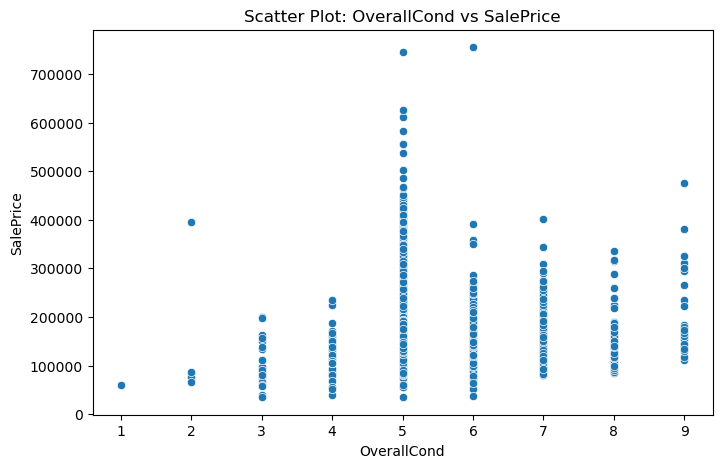

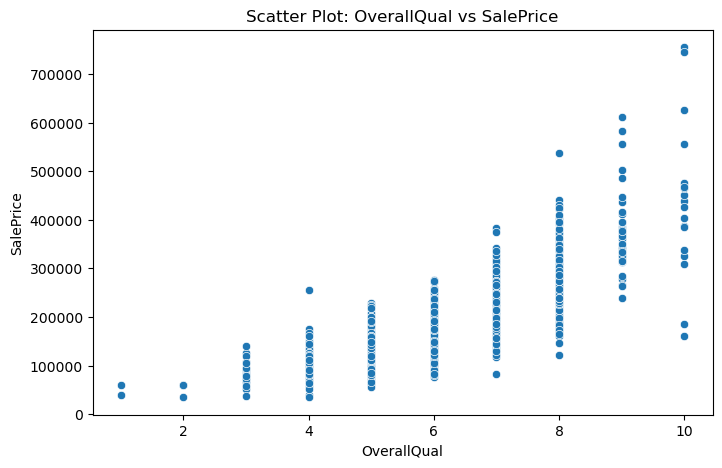

In [49]:
# Scatterplot for OverallCond vs SalePrice
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['OverallCond'], y=data['SalePrice'])
plt.title('Scatter Plot: OverallCond vs SalePrice')
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.show()

# Scatterplot for OverallQual vs SalePrice
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['OverallQual'], y=data['SalePrice'])
plt.title('Scatter Plot: OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

Seems to be linearly increasing relationship, so use as continuous numeric type.